In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = "cat-dog/train"
validation_data_dir = "cat-dog/validation/"
nb_train_samples = 24877
nb_validation_samples = 40
epochs = 20
batch_size = 10
checkpoint_filepath = "checkpoint/model-{loss:.2f}.h5" #"checkpoint/model-{epoch:02d}-{loss:.2f}.h5"


model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(img_width, img_height, 3), activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))
    
model.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.Adam(lr=0.0001),
    metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

reduce_learning_rate = ReduceLROnPlateau(
    monitor='loss',
    factor=0.1,
    patience=2,
    cooldown=2,
    min_lr=0.00001,
    verbose=1)

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor="loss",
    save_best_only=True,
    verbose=1,
    mode="min")

callbacks = [reduce_learning_rate, model_checkpoint]

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks)


Using TensorFlow backend.
W0711 15:34:21.213972 140297304647424 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/h8953/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., activation="relu", padding="same")`
W0711 15:34:21.225485 140297304647424 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 15:34:21.227273 140297304647424 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.u

KeyboardInterrupt: 

In [26]:
#model.save("model93.h5")

In [3]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

#model = load_model("model2.h5")

def prediction(filepath):
    img = image.load_img(filepath, target_size = (150, 150))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    img /= 255.
    prediction = model2.predict(img)
    if prediction > 0.5:
        return "Koira", prediction
    else:
        return "Kissa", prediction

('Kissa', array([[0.03821094]], dtype=float32))

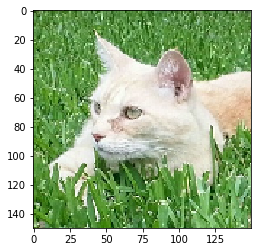

In [46]:
prediction("cat.jpg")

In [20]:
import os

path, dirs, files = next(os.walk("cat-dog/train/cat"))
len(files)

12446

In [22]:
path, dirs, files2 = next(os.walk("cat-dog/train/dog"))
len(files2)

12431

In [23]:
len(files)+len(files2)

24877

In [15]:
model2 = load_model("checkpoint/model-0.08.h5")

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = "cat-dog/train"
validation_data_dir = "cat-dog/validation/"
nb_train_samples = 24877
nb_validation_samples = 40
epochs = 10
batch_size = 10
checkpoint_filepath = "checkpoint/model2-{val_loss:.2f}.h5" #"checkpoint/model-{epoch:02d}-{loss:.2f}.h5"

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    cooldown=2,
    min_lr=0.00001,
    verbose=1)

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor="val_loss",
    save_best_only=True,
    verbose=1,
    mode="min")

callbacks = [reduce_learning_rate, model_checkpoint]

model2.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks)

Found 24875 images belonging to 2 classes.
Found 129 images belonging to 2 classes.
Epoch 1/10
2487/2487 [==============================] - 153s 62ms/step - loss: 0.0772 - acc: 0.9711 - val_loss: 0.1342 - val_acc: 0.9750

Epoch 00001: val_loss improved from inf to 0.13417, saving model to checkpoint/model2-0.13.h5
Epoch 2/10
2487/2487 [==============================] - 152s 61ms/step - loss: 0.0717 - acc: 0.9730 - val_loss: 0.0132 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.13417 to 0.01318, saving model to checkpoint/model2-0.01.h5
Epoch 3/10
2487/2487 [==============================] - 154s 62ms/step - loss: 0.0726 - acc: 0.9721 - val_loss: 0.2419 - val_acc: 0.8750

Epoch 00003: val_loss did not improve from 0.01318
Epoch 4/10
2487/2487 [==============================] - 154s 62ms/step - loss: 0.0657 - acc: 0.9744 - val_loss: 0.2611 - val_acc: 0.8718

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1e-05.

Epoch 00004: val_loss did not improve from 0.01318
Epoch

Using TensorFlow backend.
W0711 15:26:18.500265 140242800969472 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 15:26:18.512211 140242800969472 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 15:26:18.531904 140242800969472 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0711 15:26:18.598162 140242800969472 deprecation_wrapper.py:119] From /home/h8953/tensorflow_gpu_env/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. 